<a href="https://colab.research.google.com/github/ardayekh/ProfessionalDataEngineer/blob/main/Smart_Analytics%2C_Machine_Learning%2C_and_AI_on_GCP_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phases of ML Projects**

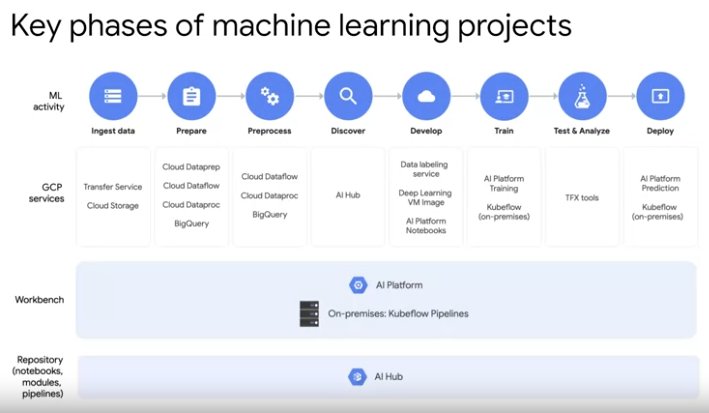

- AI Platform: It's a fully managed service for custom machine learning models both training and serving predictions. It can scale from the experimentation stage all the way to production. 
Essentially, AI platform is the engine behind doing machine learning at scale on GCP.

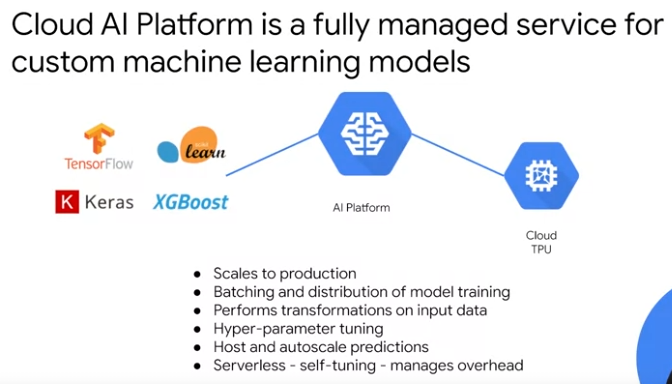

- KubeFlow: Google's open source framework for building ML pipelines and you'll have a lab on this later. KubeFlow is an open source project that packages machine learning code for Kubernetes. ClubFlow pipelines is a platform for composing, deploying, and managing end-to-end machine learning workflows.

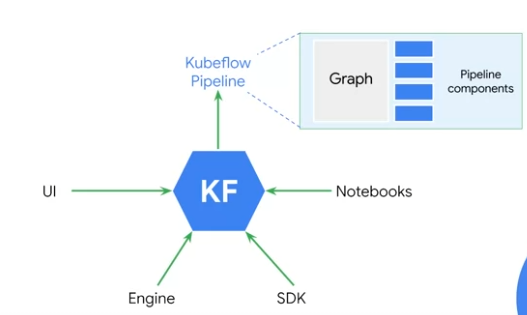

**Working with BigQuery ML**

- BigQuery ML allows your team's to easily build machine learning models on structured data using SQL-like syntax. You can quickly get a model created for forecasting, classification, and recommendations right where your data already lives in BigQuery. Teams use BigQuery ML as a quick prototyping tool to see if machine learning will work for their data set and project. Then you can dive into more of the advanced features of BigQuery ML like hyper parameter tuning and data set splitting methods to fine-tune your models performance. Unlike the ML APIs, you are able to create your own custom models with BigQuery ML..

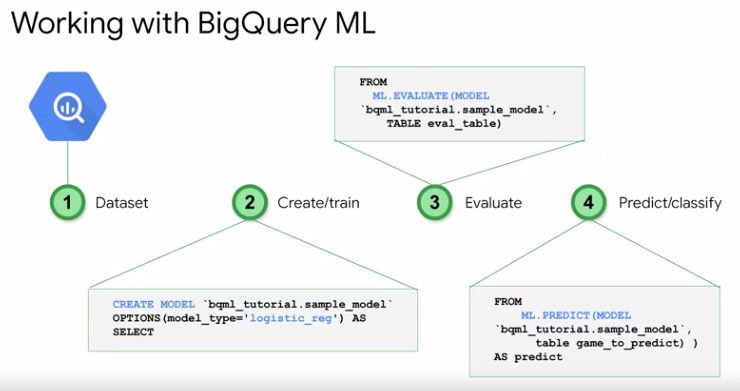

- Assuming we have labeled training data, we can train, deploy, and serve predictions using AutoML without having to write any code.

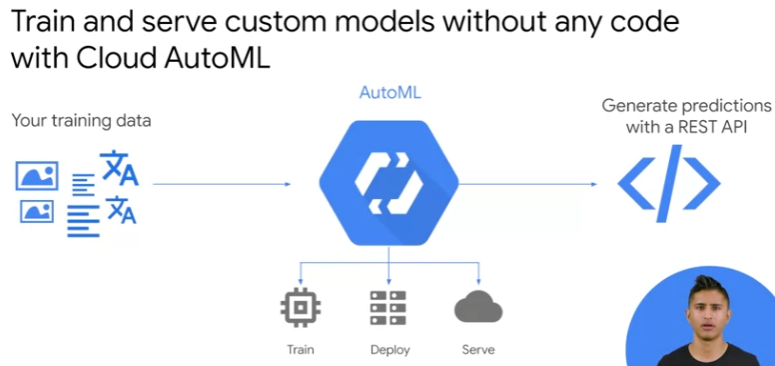

- ML required a lot of DevOps

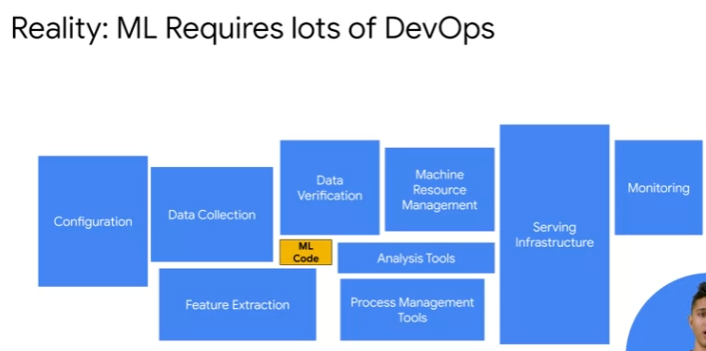

- Typical KubeFlow pipeline steps

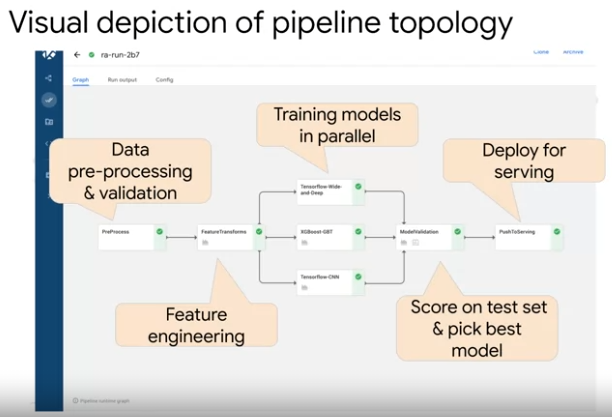

- For each step of the workflow, you can see the precise configuration parameters, inputs, and outputs. Thus, for a model trained with Kubeflow Pipelines, you never have to wonder how exactly did I create this model. Here you can quickly see how long the model training took, where the train model is, and what data was used for training and evaluation. You can define the ML workflow using Kubeflow as Python SDK. By defining the workflow, we mean specifying each steps; inputs and outputs, and how the various steps are connected.


**AI Hub**

- You can find and deploy not just containerized applications for machine learning, but also full ML pipelines on AI Hub. What asset types can we find on AI Hub? Among the assets stored on AI Hub are entire Kubeflow Pipelines, Jupyter notebooks, TensorFlow modules, fully trained models, services and VM images.

- The assets on AI Hub are collected into two scopes; public assets and restricted assets. Public assets are available to all AI Hub users. Restricted scope assets contain AI components you have uploaded and those that have been shared with you. 

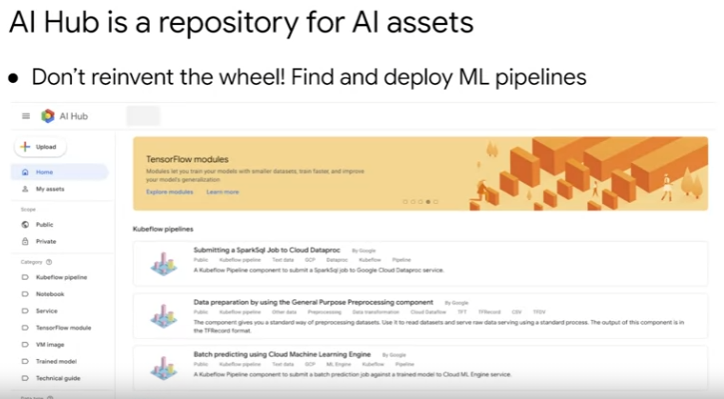

lab:

Objectives
In this lab, you perform the following tasks:

Create a Kubernetes cluster and configure AI Platform pipelines

Launch pipelines dashboard

Create and run an experiment from an example end-to-end ML Pipeline

Examine and verify the output of each step

Inspect the pipeline graph, various metrics, logs, charts and parameters

**Model Evaluation**

- High precision means a low false positive rate, meaning we really punish a model's precision if it makes a ton of bad guesses. Recall on the other hand is the ratio of correctly predicted positive observations to all observations in the actual class. How many did we get right out of both true positives and false negatives? Accuracy is simply true positives plus the true negatives over the entire set of observations.

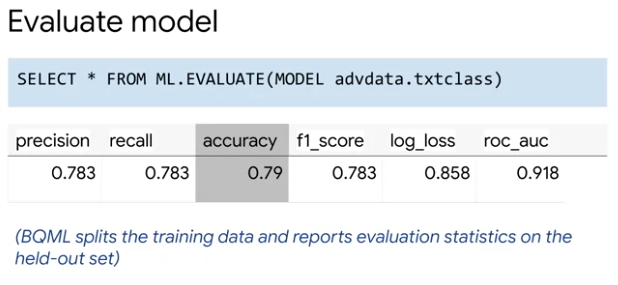

**Batch Predicting Example using BigQuery**

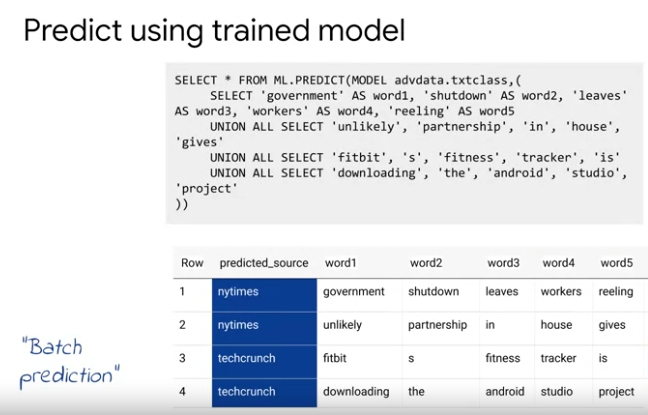

**Model Examples**

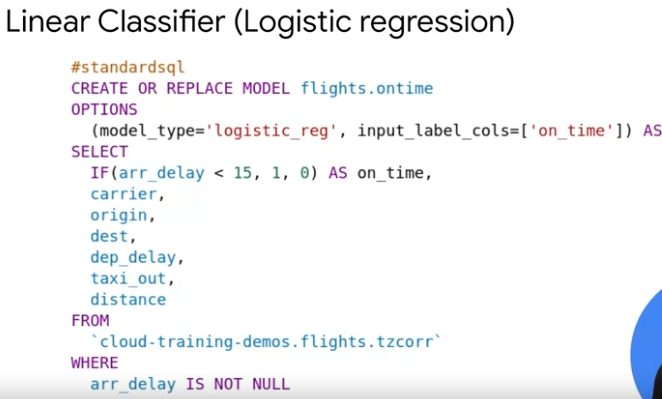

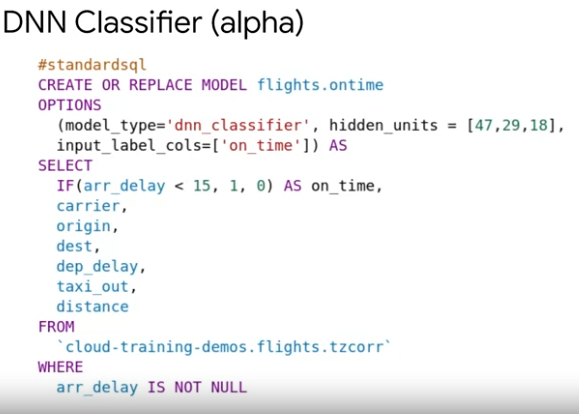

-  So far, we've only talked about classification. You can also use BQML to do regression. In this example, we're fitting a linear regression model to predict taxi fare based on features such as the hour of day, pick-up and drop off location, and the day of the week. If you need a model more complex than linear regression, you can use a DNN regressor in BQML.

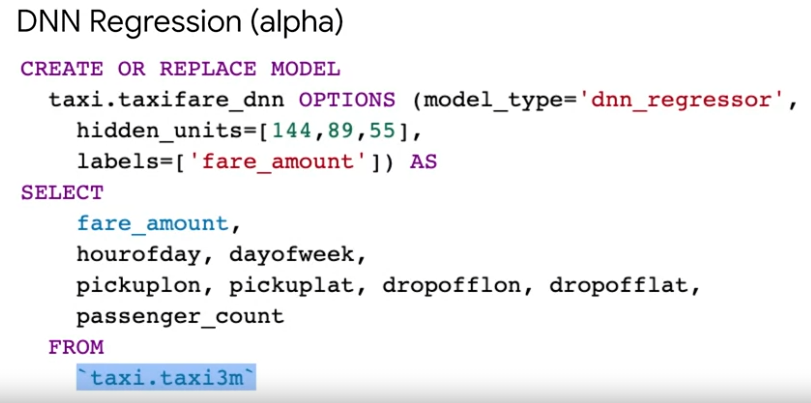

**Using a model trained on Tensor Flow in BigQuery**

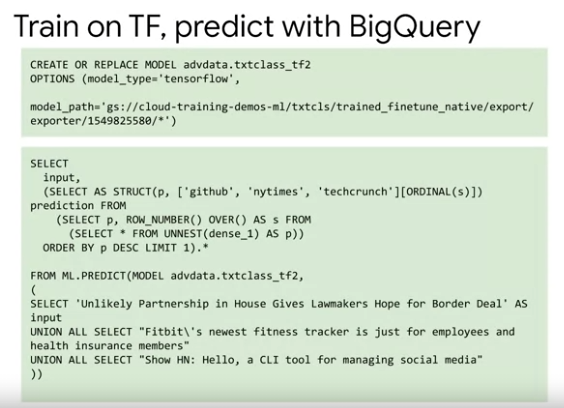

**Recommendation Model Example**

- The type of model being used for this is called a matrix factorization model. In short, matrix factorization models are a form of collaborative filtering algorithms used in recommender systems. Matrix factorization algorithms work by decomposing the user item interaction matrix. That is, the matrix consisting of users and recommendations gets broken apart into the product of two lower dimensionality rectangular matrices. This matrix will be really sparse, since users will only review a few products. For example, if we have one million movies on our streaming platform, you don't expect a user will review more than a handful. For this reason, we expect our matrices to be low rank and thus can store the information in smaller matrices without much loss of information. 


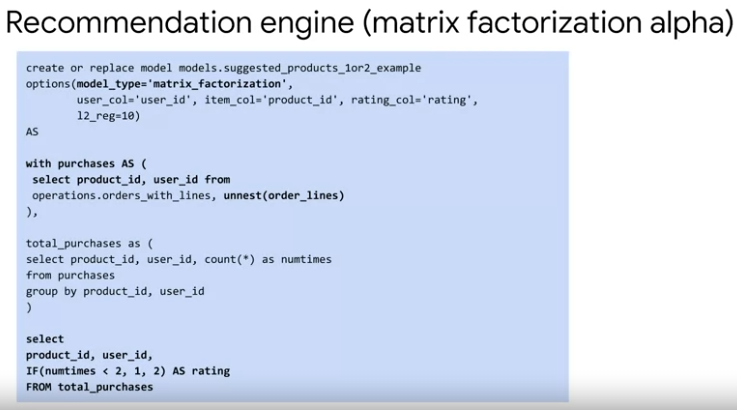

**Unsupervised learning mdoels**

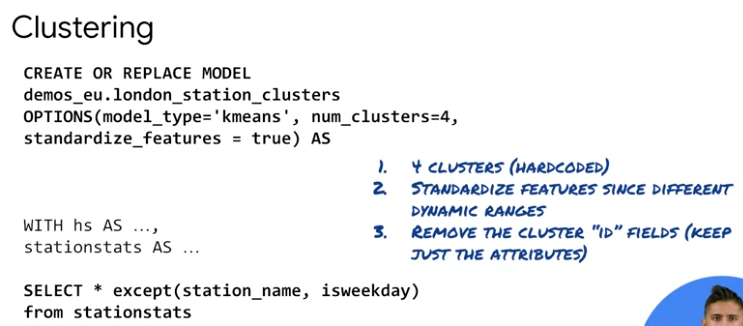

- Using Transform ensures that the raw inputs expected from clients will be transformed to avoid training and serving skew at prediction time. On the left we see that the transformations are done in the query defining the training data set. In this case, the user of the model would have to perform these same transformations. However, how would they know what transformations to perform in general and should this even be a worry on the client side? We instead move the casting into a transform statement. Now when the client sends in a prediction, the transformations on the start date field will be automatically applied before serving a prediction.

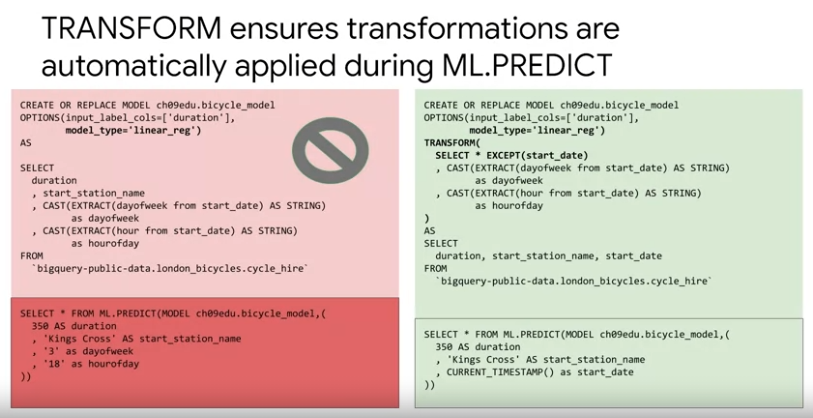

**BigQuery ML Cheatsheet**

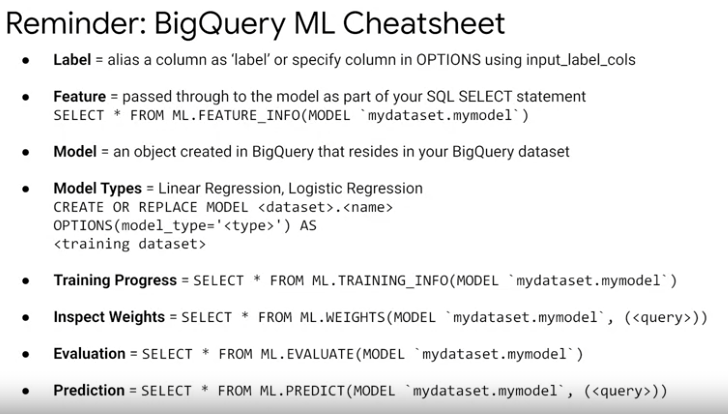

Lab: 

Objectives

In this lab, you learn to perform the following tasks:

Create a BigQuery dataset to store and load MovieLens data

Explore the MovieLens dataset

Use a trained model to make recommendations in BigQuery

Make product predictions for both single users and batch users

Lab:

Objectives
In this lab, you learn to perform the following tasks:

Query and explore the London bicycles dataset for feature engineering

Create a linear regression model in BigQuery ML

Evaluate the performance of your machine learning model

Extract your model weights

What you'll need

In [ ]:
-- example of code to train a linear regresiion model in BigQuery ML

CREATE OR REPLACE MODEL
  bike_model.model
OPTIONS
  (input_label_cols=['duration'],
    model_type='linear_reg') AS
SELECT
  duration,
  start_station_name,
  CAST(EXTRACT(dayofweek
    FROM
      start_date) AS STRING) AS dayofweek,
  CAST(EXTRACT(hour
    FROM
      start_date) AS STRING) AS hourofday
FROM
  `bigquery-public-data`.london_bicycles.cycle_hire

**AutoML**

- Cloud AutoML is a service on Google Cloud platform that allows you to build powerful machine learning models with minimal effort and machine learning expertise.

- Cloud AutoML is a service on Google Cloud platform that allows you to build powerful machine learning models with minimal effort and machine learning expertise. After the data set is prepared and validated, you use it to train the model. Finally, the model is used with test data to evaluate whether it is going to be effective in predicting and classifying new cases.

- Cloud AutoML uses a prepared data set to train a custom model. You can make small prepared datasets for experimentation directly in the web UI but it is more common to assemble the information in a CSV comma separated value file. The CSV file must be utf-8 encoded and located in the same cloud storage bucket as the source files. You can also create and manage prepared datasets programmatically in Python, Java, or Node.js. 

- The first column in the CSV file is optional. It assigns the data in each row into one of the three groups, train, validation, or test. If you leave out this column, the rows will automatically be assigned with 80% going to train, 10% going to each validation and test. 
The next column in the CSV file identifies source files that are hosted in cloud storage. These are paths beginning with GS colon slash slash. Subsequent columns specify labels. The labels are alphanumeric and can contain underscores but not special characters. The CSV file should not contain duplicate lines and may not contain blank lines or Unicode characters.

- Part of the process uses the validation group data to verify how well the model works at classifying and predicting. Supervised learning works on correctable error. Cloud AutoML constructs an algorithm that guesses the labels for source data. When the guess is right, it strengthens the algorithm. When the guess is wrong, the error is used to correct the algorithm. And this is how learning occurs. One full run through all the trained group data is called an epoch. Total error is track and minimized through multiple epochs to create the best model possible from the training data provided.

- You can make a classification using the web UR or from the command line using CURL to send a Json structured request. There are also client libraries for Python, Java, and Node.js. After you have set up authentication to use the REST API, you send a request with the model name and the payload, which is the data you want classified. The service returns Json containing multiple fields called displayName. These are the labels that matched.

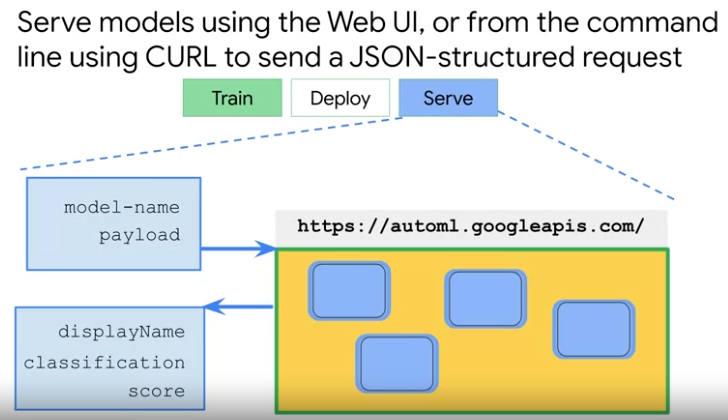

- With Cloud AutoML you can create smaller more specialized custom models and use them programmatically. So you don't have to squeeze everything into one model. ou can break apart a classification into multiple steps. And you can use the results of one classification to make choices about what kind of classification to perform next.

- Cloud AutoML Vision specializes in training models for image classification. You can load the CSV file and the image files from cloud storage, or you can upload them from your local computer using Import. Training supports several file formats, including JPEG and PNG. The images can be up to 30 MB in size. They have to be converted to Base64 encoding which stores the image as a text file. The prepared file will be a TXT file or a compressed ZIP file. Service requests only recognize JPEG, PNG, and GIF files up to 1.5 MB. The trained model will work best when there are at most 100 times more images for the most common label than for the least common label. Consequently, for model performance, it is recommended that you remove very-low-frequency labels

- Cloud auto ML natural language specializes in training models for text data. For example, if you have a set of newspaper articles, you can use the auto ML NLP service to classify if a given article is for example about sports or politics. The text to be recognized can be inline texts in the cell of the CSV file. More commonly, the text is contained in documents which are dot txt files or are compressed in zip format. The path to the cloud storage location of the document appears in the CSV file. Currently, the documents must be standard texts and do not support Unicode. The documents can be as small as one sentence or up to a maximum of a 128 kilobytes. You can have anywhere from 2-100 labels. The custom model is evaluated on average precision. That is a value from 0.5-1.0. Its formal name is the area under the precision/recall curve. A higher number indicates more accurate classification and prediction. The evaluation report also supplies confidence threshold curves which is a way of characterizing false positive classification against true positives. For models that apply one label per document, the evaluation report includes a confusion matrix

- While AutoML vision and NLP are for unstructured data, AutoML table is for structured data. the easiest way to import your data into AutoML tables is through BigQuery. You can also import data using CSV files start locally or on cloud storage. One of the advantages of importing data through BigQuery is its support for a arrays and structs. Regardless, for both import sources, your data must have between 1000 and 100 million rows, between 2 and 1000 columns and be 100 gig or less in size. Once you're happy with your model performance, you can go ahead and deploy it, you have the option of making batch or online predictions. For online predictions you can make calls using a curl command, or one of the Java, Node.js or Python APIs, the same APIs are available for batch predictions. You can make batch predictions on either BigQuery tables or CSV files. However, the BigQuery data source tables must be no larger than 100 GB. For CSV files each data source file can be no larger than 10GB, and if you include multiple files the sum of all files cannot exceed 100GB.

**How to choose between BQML, AutoML and a custom model**

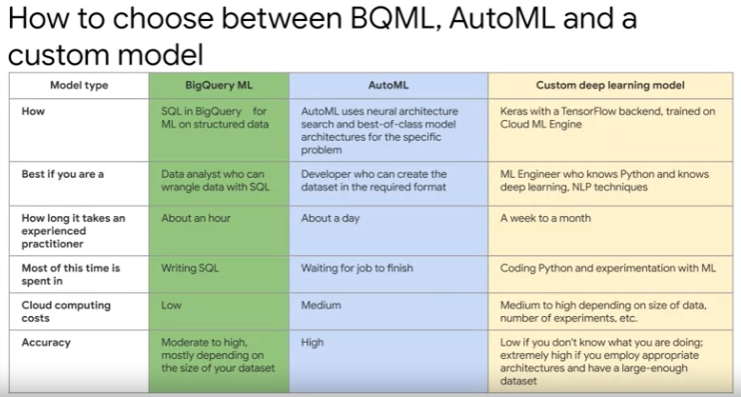